In [110]:
import xarray as xr
import numpy as np
import os
import requests
import zarr
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import matplotlib.colors as mcolors

In [75]:
#woa_urlx = 'https://www.ncei.noaa.gov/data/oceans/woa/WOA23/DATA/temperature/netcdf/decav/0.25/woa23_decav_t01_04.nc'
# Load the dataset
dataset_path = '../tmp_data/woa23_all_A00_01.nc'
ds = xr.open_dataset(dataset_path, decode_times=False)

In [76]:
ds

<xarray.Dataset> Size: 291MB
Dimensions:             (lat: 180, nbounds: 2, lon: 360, depth: 102, time: 1)
Coordinates:
  * lat                 (lat) float32 720B -89.5 -88.5 -87.5 ... 87.5 88.5 89.5
  * lon                 (lon) float32 1kB -179.5 -178.5 -177.5 ... 178.5 179.5
  * depth               (depth) float32 408B 0.0 5.0 10.0 ... 5.4e+03 5.5e+03
  * time                (time) float32 4B 3.894e+03
Dimensions without coordinates: nbounds
Data variables: (12/14)
    crs                 int32 4B ...
    lat_bnds            (lat, nbounds) float32 1kB ...
    lon_bnds            (lon, nbounds) float32 3kB ...
    depth_bnds          (depth, nbounds) float32 816B ...
    climatology_bounds  (time, nbounds) float32 8B ...
    A_an                (time, depth, lat, lon) float32 26MB ...
    ...                  ...
    A_sd                (time, depth, lat, lon) float32 26MB ...
    A_se                (time, depth, lat, lon) float32 26MB ...
    A_oa                (time, depth, lat, lon) float32 26MB ...
    A_gp                (time, depth, lat, lon) float64 53MB ...
    A_sdo               (time, depth, lat, lon) float32 26MB ...
    A_sea               (time, depth, lat, lon) float32 26MB ...
Attributes: (12/45)
    Conventions:                     CF-1.6
    title:                           World Ocean Atlas 2023 : apparent_oxygen...
    summary:                         
    references:                      Garcia, H.E., Z. Wang, C. Bouchard, S.L....
    institution:                     NOAA National Centers for Environmental ...
    comment:                         Global Climatology as part of the World ...
    ...                              ...
    ncei_template_version:           NCEI_NetCDF_Grid_Template_v1.0
    license:                         These data are openly available to the p...
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    metadata_link:                   https://www.ncei.noaa.gov/products/world...
    date_created:                    2024-05-30 
    date_modified:                   2024-05-30

In [ ]:
 #['an', 'mn', 'dd', 'ma', 'sd', 'se', 'oa', 'gp', 'sdo', 'sea']

In [60]:
lon1 = np.arange(-179.5, 180, 1.0, dtype=np.float32)
print(len(lon1))
lon1

360


array([-179.5, -178.5, -177.5, -176.5, -175.5, -174.5, -173.5, -172.5,
       -171.5, -170.5, -169.5, -168.5, -167.5, -166.5, -165.5, -164.5,
       -163.5, -162.5, -161.5, -160.5, -159.5, -158.5, -157.5, -156.5,
       -155.5, -154.5, -153.5, -152.5, -151.5, -150.5, -149.5, -148.5,
       -147.5, -146.5, -145.5, -144.5, -143.5, -142.5, -141.5, -140.5,
       -139.5, -138.5, -137.5, -136.5, -135.5, -134.5, -133.5, -132.5,
       -131.5, -130.5, -129.5, -128.5, -127.5, -126.5, -125.5, -124.5,
       -123.5, -122.5, -121.5, -120.5, -119.5, -118.5, -117.5, -116.5,
       -115.5, -114.5, -113.5, -112.5, -111.5, -110.5, -109.5, -108.5,
       -107.5, -106.5, -105.5, -104.5, -103.5, -102.5, -101.5, -100.5,
        -99.5,  -98.5,  -97.5,  -96.5,  -95.5,  -94.5,  -93.5,  -92.5,
        -91.5,  -90.5,  -89.5,  -88.5,  -87.5,  -86.5,  -85.5,  -84.5,
        -83.5,  -82.5,  -81.5,  -80.5,  -79.5,  -78.5,  -77.5,  -76.5,
        -75.5,  -74.5,  -73.5,  -72.5,  -71.5,  -70.5,  -69.5,  -68.5,
      

In [61]:
lat1 = np.arange(-89.5, 90, 1.0, dtype=np.float32)
print(len(lat1))
lat1

180


array([-89.5, -88.5, -87.5, -86.5, -85.5, -84.5, -83.5, -82.5, -81.5,
       -80.5, -79.5, -78.5, -77.5, -76.5, -75.5, -74.5, -73.5, -72.5,
       -71.5, -70.5, -69.5, -68.5, -67.5, -66.5, -65.5, -64.5, -63.5,
       -62.5, -61.5, -60.5, -59.5, -58.5, -57.5, -56.5, -55.5, -54.5,
       -53.5, -52.5, -51.5, -50.5, -49.5, -48.5, -47.5, -46.5, -45.5,
       -44.5, -43.5, -42.5, -41.5, -40.5, -39.5, -38.5, -37.5, -36.5,
       -35.5, -34.5, -33.5, -32.5, -31.5, -30.5, -29.5, -28.5, -27.5,
       -26.5, -25.5, -24.5, -23.5, -22.5, -21.5, -20.5, -19.5, -18.5,
       -17.5, -16.5, -15.5, -14.5, -13.5, -12.5, -11.5, -10.5,  -9.5,
        -8.5,  -7.5,  -6.5,  -5.5,  -4.5,  -3.5,  -2.5,  -1.5,  -0.5,
         0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,
         9.5,  10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,  17.5,
        18.5,  19.5,  20.5,  21.5,  22.5,  23.5,  24.5,  25.5,  26.5,
        27.5,  28.5,  29.5,  30.5,  31.5,  32.5,  33.5,  34.5,  35.5,
        36.5,  37.5,

In [36]:
ds['depth'].values
#43 levels demo

array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
        55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100., 125.,
       150., 175., 200., 225., 250., 275., 300., 325., 350., 375., 400.,
       425., 450., 475., 500., 550., 600., 650., 700., 750., 800.],
      dtype=float32)

In [39]:
#43 levels
np.concatenate([np.arange(0, 100, 5), np.arange(100, 500, 25), np.arange(500, 850, 50)], dtype=np.float32)

array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
        55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100., 125.,
       150., 175., 200., 225., 250., 275., 300., 325., 350., 375., 400.,
       425., 450., 475., 500., 550., 600., 650., 700., 750., 800.],
      dtype=float32)

In [42]:
#57 levels demo
ds['depth'].values

array([   0.,    5.,   10.,   15.,   20.,   25.,   30.,   35.,   40.,
         45.,   50.,   55.,   60.,   65.,   70.,   75.,   80.,   85.,
         90.,   95.,  100.,  125.,  150.,  175.,  200.,  225.,  250.,
        275.,  300.,  325.,  350.,  375.,  400.,  425.,  450.,  475.,
        500.,  550.,  600.,  650.,  700.,  750.,  800.,  850.,  900.,
        950., 1000., 1050., 1100., 1150., 1200., 1250., 1300., 1350.,
       1400., 1450., 1500.], dtype=float32)

In [44]:
#57 levels
np.concatenate([np.arange(0, 100, 5), np.arange(100, 500, 25), np.arange(500, 800, 50), np.arange(800, 1550, 50)], dtype=np.float32)

array([   0.,    5.,   10.,   15.,   20.,   25.,   30.,   35.,   40.,
         45.,   50.,   55.,   60.,   65.,   70.,   75.,   80.,   85.,
         90.,   95.,  100.,  125.,  150.,  175.,  200.,  225.,  250.,
        275.,  300.,  325.,  350.,  375.,  400.,  425.,  450.,  475.,
        500.,  550.,  600.,  650.,  700.,  750.,  800.,  850.,  900.,
        950., 1000., 1050., 1100., 1150., 1200., 1250., 1300., 1350.,
       1400., 1450., 1500.], dtype=float32)

In [47]:
#102 levels demo, ex o00
ds['depth'].values

array([0.00e+00, 5.00e+00, 1.00e+01, 1.50e+01, 2.00e+01, 2.50e+01,
       3.00e+01, 3.50e+01, 4.00e+01, 4.50e+01, 5.00e+01, 5.50e+01,
       6.00e+01, 6.50e+01, 7.00e+01, 7.50e+01, 8.00e+01, 8.50e+01,
       9.00e+01, 9.50e+01, 1.00e+02, 1.25e+02, 1.50e+02, 1.75e+02,
       2.00e+02, 2.25e+02, 2.50e+02, 2.75e+02, 3.00e+02, 3.25e+02,
       3.50e+02, 3.75e+02, 4.00e+02, 4.25e+02, 4.50e+02, 4.75e+02,
       5.00e+02, 5.50e+02, 6.00e+02, 6.50e+02, 7.00e+02, 7.50e+02,
       8.00e+02, 8.50e+02, 9.00e+02, 9.50e+02, 1.00e+03, 1.05e+03,
       1.10e+03, 1.15e+03, 1.20e+03, 1.25e+03, 1.30e+03, 1.35e+03,
       1.40e+03, 1.45e+03, 1.50e+03, 1.55e+03, 1.60e+03, 1.65e+03,
       1.70e+03, 1.75e+03, 1.80e+03, 1.85e+03, 1.90e+03, 1.95e+03,
       2.00e+03, 2.10e+03, 2.20e+03, 2.30e+03, 2.40e+03, 2.50e+03,
       2.60e+03, 2.70e+03, 2.80e+03, 2.90e+03, 3.00e+03, 3.10e+03,
       3.20e+03, 3.30e+03, 3.40e+03, 3.50e+03, 3.60e+03, 3.70e+03,
       3.80e+03, 3.90e+03, 4.00e+03, 4.10e+03, 4.20e+03, 4.30e

In [48]:
#102 levels
np.concatenate([np.arange(0, 100, 5), np.arange(100, 500, 25), np.arange(500, 800, 50), np.arange(800, 2000, 50), np.arange(2000, 5600, 100)], dtype=np.float32)

array([0.00e+00, 5.00e+00, 1.00e+01, 1.50e+01, 2.00e+01, 2.50e+01,
       3.00e+01, 3.50e+01, 4.00e+01, 4.50e+01, 5.00e+01, 5.50e+01,
       6.00e+01, 6.50e+01, 7.00e+01, 7.50e+01, 8.00e+01, 8.50e+01,
       9.00e+01, 9.50e+01, 1.00e+02, 1.25e+02, 1.50e+02, 1.75e+02,
       2.00e+02, 2.25e+02, 2.50e+02, 2.75e+02, 3.00e+02, 3.25e+02,
       3.50e+02, 3.75e+02, 4.00e+02, 4.25e+02, 4.50e+02, 4.75e+02,
       5.00e+02, 5.50e+02, 6.00e+02, 6.50e+02, 7.00e+02, 7.50e+02,
       8.00e+02, 8.50e+02, 9.00e+02, 9.50e+02, 1.00e+03, 1.05e+03,
       1.10e+03, 1.15e+03, 1.20e+03, 1.25e+03, 1.30e+03, 1.35e+03,
       1.40e+03, 1.45e+03, 1.50e+03, 1.55e+03, 1.60e+03, 1.65e+03,
       1.70e+03, 1.75e+03, 1.80e+03, 1.85e+03, 1.90e+03, 1.95e+03,
       2.00e+03, 2.10e+03, 2.20e+03, 2.30e+03, 2.40e+03, 2.50e+03,
       2.60e+03, 2.70e+03, 2.80e+03, 2.90e+03, 3.00e+03, 3.10e+03,
       3.20e+03, 3.30e+03, 3.40e+03, 3.50e+03, 3.60e+03, 3.70e+03,
       3.80e+03, 3.90e+03, 4.00e+03, 4.10e+03, 4.20e+03, 4.30e

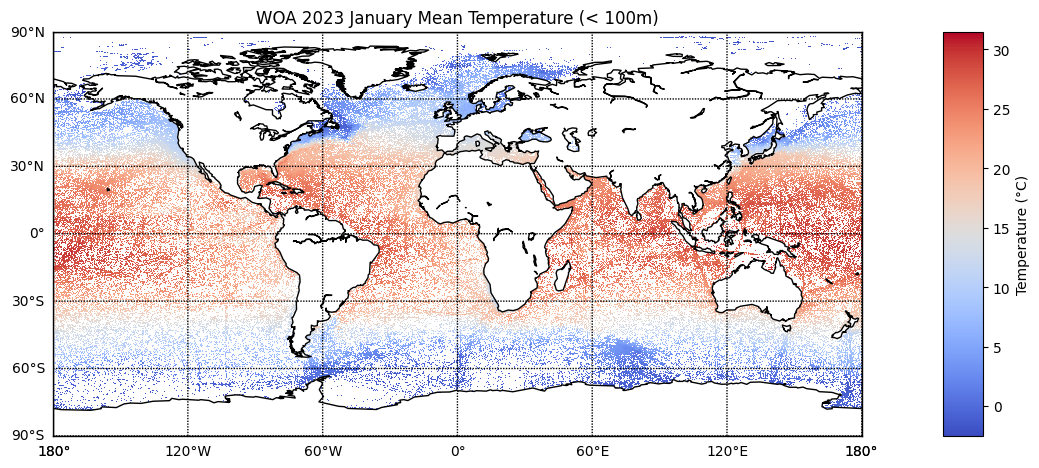

In [5]:
# Extract temperature mean (t_mn) and restrict to depth < 100m
depth_threshold = 100
t_mn = ds['t_mn'].sel(depth=slice(0, depth_threshold)).mean(dim='depth')

# Plotting the world ocean map with temperature distribution
fig, ax = plt.subplots(figsize=(12, 8))
m = Basemap(projection='cyl', lon_0=0, ax=ax)
m.drawcoastlines()
m.drawmapboundary()
m.drawparallels(np.arange(-90., 91., 30.), labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(0., 360., 60.), labels=[0, 0, 0, 1])

lon, lat = np.meshgrid(t_mn.lon, t_mn.lat)
x, y = m(lon, lat)

c_scheme = m.pcolormesh(x, y, t_mn[0, :, :], shading='auto', cmap='coolwarm')
cbar = m.colorbar(c_scheme, location='right', pad="10%")
cbar.set_label('Temperature (°C)')

plt.title('WOA 2023 January Mean Temperature (< 100m)')
plt.show()

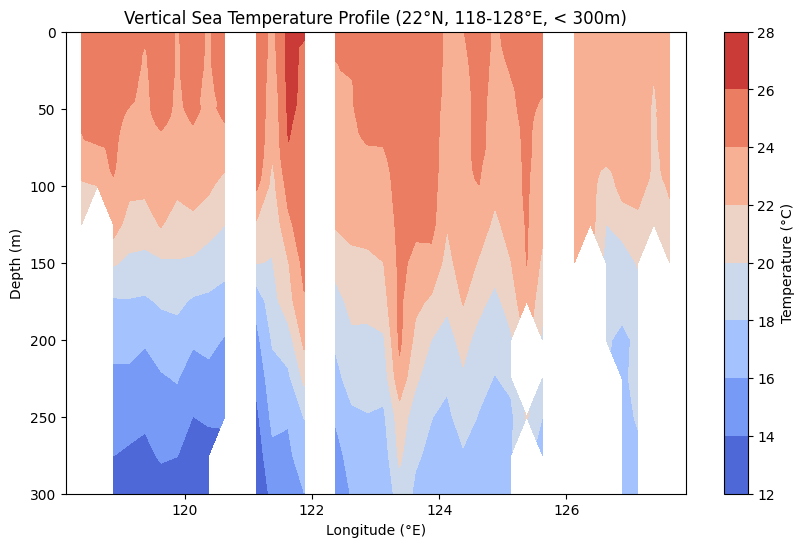

In [8]:
# Define parameters
depth_threshold = 300
lat_value = 22
lon_start = 118
lon_end = 128

# Select the nearest latitude value to 22°
lat_selected = ds['t_mn'].sel(lat=lat_value, method='nearest').lat.item()

# Select the temperature profile for the specified latitude and longitude range, restricted to depth < 300m
t_profile = ds['t_mn'].sel(depth=slice(0, depth_threshold), lat=lat_selected, lon=slice(lon_start, lon_end))

# Plotting the vertical sea temperature profile
fig, ax = plt.subplots(figsize=(10, 6))
x, y = np.meshgrid(t_profile.lon, t_profile.depth)
contour = ax.contourf(x, y, t_profile[0, :, :], cmap='coolwarm')
cbar = plt.colorbar(contour)
cbar.set_label('Temperature (°C)')

ax.invert_yaxis()
ax.set_xlabel('Longitude (°E)')
ax.set_ylabel('Depth (m)')
plt.title(f'Vertical Sea Temperature Profile (22°N, 118-128°E, < 300m)')
plt.show()

In [6]:
ds = xr.open_dataset('../tmp_data/woa23_decav_t01_04.nc', decode_times=False)

# Extract the values of the specified variables
lat_bnds = ds['lat_bnds'].values
lon_bnds = ds['lon_bnds'].values
depth_bnds = ds['depth_bnds'].values
climatology_bounds = ds['climatology_bounds'].values

lat_bnds, lon_bnds, depth_bnds, climatology_bounds

(array([[-90.  , -89.75],
        [-89.75, -89.5 ],
        [-89.5 , -89.25],
        ...,
        [ 89.25,  89.5 ],
        [ 89.5 ,  89.75],
        [ 89.75,  90.  ]], dtype=float32),
 array([[-180.  , -179.75],
        [-179.75, -179.5 ],
        [-179.5 , -179.25],
        ...,
        [ 179.25,  179.5 ],
        [ 179.5 ,  179.75],
        [ 179.75,  180.  ]], dtype=float32),
 array([[   0. ,    2.5],
        [   2.5,    7.5],
        [   7.5,   12.5],
        [  12.5,   17.5],
        [  17.5,   22.5],
        [  22.5,   27.5],
        [  27.5,   32.5],
        [  32.5,   37.5],
        [  37.5,   42.5],
        [  42.5,   47.5],
        [  47.5,   52.5],
        [  52.5,   57.5],
        [  57.5,   62.5],
        [  62.5,   67.5],
        [  67.5,   72.5],
        [  72.5,   77.5],
        [  77.5,   82.5],
        [  82.5,   87.5],
        [  87.5,   92.5],
        [  92.5,   97.5],
        [  97.5,  112.5],
        [ 112.5,  137.5],
        [ 137.5,  162.5],
        [ 162.5,  

In [2]:
ds = xr.open_dataset('../tmp_data/woa23_decav_s01_04.nc', decode_times=False)

# Extract the values of the specified variables
lat_bnds = ds['lat_bnds'].values
lon_bnds = ds['lon_bnds'].values
depth_bnds = ds['depth_bnds'].values
climatology_bounds = ds['climatology_bounds'].values

lat_bnds, lon_bnds, depth_bnds, climatology_bounds

(array([[-90.  , -89.75],
        [-89.75, -89.5 ],
        [-89.5 , -89.25],
        ...,
        [ 89.25,  89.5 ],
        [ 89.5 ,  89.75],
        [ 89.75,  90.  ]], dtype=float32),
 array([[-180.  , -179.75],
        [-179.75, -179.5 ],
        [-179.5 , -179.25],
        ...,
        [ 179.25,  179.5 ],
        [ 179.5 ,  179.75],
        [ 179.75,  180.  ]], dtype=float32),
 array([[   0. ,    2.5],
        [   2.5,    7.5],
        [   7.5,   12.5],
        [  12.5,   17.5],
        [  17.5,   22.5],
        [  22.5,   27.5],
        [  27.5,   32.5],
        [  32.5,   37.5],
        [  37.5,   42.5],
        [  42.5,   47.5],
        [  47.5,   52.5],
        [  52.5,   57.5],
        [  57.5,   62.5],
        [  62.5,   67.5],
        [  67.5,   72.5],
        [  72.5,   77.5],
        [  77.5,   82.5],
        [  82.5,   87.5],
        [  87.5,   92.5],
        [  92.5,   97.5],
        [  97.5,  112.5],
        [ 112.5,  137.5],
        [ 137.5,  162.5],
        [ 162.5,  

In [5]:
print(ds['lon'].values)
print(ds['lat'].values)

[-179.875 -179.625 -179.375 ...  179.375  179.625  179.875]
[-89.875 -89.625 -89.375 -89.125 -88.875 -88.625 -88.375 -88.125 -87.875
 -87.625 -87.375 -87.125 -86.875 -86.625 -86.375 -86.125 -85.875 -85.625
 -85.375 -85.125 -84.875 -84.625 -84.375 -84.125 -83.875 -83.625 -83.375
 -83.125 -82.875 -82.625 -82.375 -82.125 -81.875 -81.625 -81.375 -81.125
 -80.875 -80.625 -80.375 -80.125 -79.875 -79.625 -79.375 -79.125 -78.875
 -78.625 -78.375 -78.125 -77.875 -77.625 -77.375 -77.125 -76.875 -76.625
 -76.375 -76.125 -75.875 -75.625 -75.375 -75.125 -74.875 -74.625 -74.375
 -74.125 -73.875 -73.625 -73.375 -73.125 -72.875 -72.625 -72.375 -72.125
 -71.875 -71.625 -71.375 -71.125 -70.875 -70.625 -70.375 -70.125 -69.875
 -69.625 -69.375 -69.125 -68.875 -68.625 -68.375 -68.125 -67.875 -67.625
 -67.375 -67.125 -66.875 -66.625 -66.375 -66.125 -65.875 -65.625 -65.375
 -65.125 -64.875 -64.625 -64.375 -64.125 -63.875 -63.625 -63.375 -63.125
 -62.875 -62.625 -62.375 -62.125 -61.875 -61.625 -61.375 -61.125

In [8]:
depthx = ds['depth'].values
depthx

array([   0.,    5.,   10.,   15.,   20.,   25.,   30.,   35.,   40.,
         45.,   50.,   55.,   60.,   65.,   70.,   75.,   80.,   85.,
         90.,   95.,  100.,  125.,  150.,  175.,  200.,  225.,  250.,
        275.,  300.,  325.,  350.,  375.,  400.,  425.,  450.,  475.,
        500.,  550.,  600.,  650.,  700.,  750.,  800.,  850.,  900.,
        950., 1000., 1050., 1100., 1150., 1200., 1250., 1300., 1350.,
       1400., 1450., 1500.], dtype=float32)

In [9]:
lonx = ds['lon'].values
lonx

array([-179.875, -179.625, -179.375, ...,  179.375,  179.625,  179.875],
      dtype=float32)

In [ ]:
# https://odv.awi.de/fileadmin/user_upload/odv/data/WOA23/woa23documentation.pdf
"""
an: Objectively analyzed climatology
mn: Statistical mean
dd: Number of observations
ma: Seasonal or monthly climatology minus annual climatology
sd: Standard deviation from statistical mean
se: Standard error of the statistical mean
oa: Statistical mean minus objectively analyzed climatology
gp: Number of mean values within radius of influence
sdo: Objectively analyzed standard deviation
sea: Standard error of the analysis
"""
# parameters: abbreviation
"""
Temperature (°C): t
Salinity (unitless): s
Dissolved Oxygen (µmol/kg): o (in lowercase)
Percent Oxygen Saturation (%): O (in uppercase)
Apparent Oxygen Utilization (µmol/kg): A (in uppercase) 
Silicate (µmol/kg): i
Phosphate (µmol/kg): p
Nitrate (µmol/kg): n
"""

In [2]:
# Define paths and parameters
grid_resolutions = {'01': '1.00', '04': '0.25'}
grid_dir = {'01': '1_degree', '04': '0.25_degree'}
parameters = {
    't': 'temperature',
    's': 'salinity',
    'o': 'oxygen',
    'O': 'o2sat',
    'A': 'AOU',
    'i': 'silicate',
    'p': 'phosphate',
    'n': 'nitrate'
}
time_periods = {
    '0': 'annual',
    '1': 'january',
    '2': 'february',
    '3': 'march',
    '4': 'april',
    '5': 'may',
    '6': 'june',
    '7': 'july',
    '8': 'august',
    '9': 'september',
    '10': 'october',
    '11': 'november',
    '12': 'december',
    '13': 'winter',
    '14': 'spring',
    '15': 'summer',
    '16': 'autumn'
}
data_variables = ['an', 'mn', 'dd', 'ma', 'sd', 'se', 'oa', 'gp', 'sdo', 'sea']

In [17]:
list(time_periods)

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16']

In [299]:
# Create directories if not exist
def create_directories(data_dir):
    for res in grid_dir.values():
        path = os.path.join(data_dir, res)
        os.makedirs(path, exist_ok=True)

# Function to download data
def download_data(url, save_path):
    response = requests.get(url)
    with open(save_path, 'wb') as file:
        file.write(response.content)

# Function to initialize Zarr store with required dimensions
def initialize_zarr_store(zarr_group_path, ds, chunk_sizes):
    coords = {
        'lon': ds.coords['lon'],
        'lat': ds.coords['lat'],
        'depth': ds.coords['depth'],
        'parameters': list(parameters.values()),
        'time_periods': list(time_periods.keys())  # Use numeric keys for time_periods
    }
    ds_empty = xr.Dataset(coords=coords)
    ds_empty = ds_empty.chunk(chunk_sizes)  # Apply consistent chunking
    ds_empty.to_zarr(zarr_group_path, mode='w')

   
def append_to_zarr_store(nc_file, data_dir, param, period, grid_res, is_first, chunk_sizes):
    ds = xr.open_dataset(nc_file, decode_times=False)

    # Initialize Zarr store if it's the first file
    zarr_group_path = f'{data_dir}/{grid_dir[grid_res]}'
    if is_first:
        initialize_zarr_store(zarr_group_path, ds, chunk_sizes)

    ds = ds.drop_vars(['crs', 'lat_bnds', 'lon_bnds', 'depth_bnds', 'climatology_bounds'], errors='ignore')
    rename_vars = {f'{param}_{var}': var for var in data_variables}
    ds = ds.rename(rename_vars)
    for var in data_variables:
        ds[var] = ds[var].squeeze('time', drop=True)
    ds = ds.drop_vars('time', errors='ignore')
    param_name = parameters[param]
    period_key = period
    
    # Expand dimensions only if they do not already exist
    if "parameters" not in ds.dims:
        ds = ds.expand_dims("parameters").assign_coords(parameters=("parameters", [param_name]))
        
    if "time_periods" not in ds.dims:
        ds = ds.expand_dims("time_periods").assign_coords(time_periods=("time_periods", [period_key]))
    
    ds = ds.chunk(chunk_sizes)

    store = zarr.DirectoryStore(f'{data_dir}/{grid_dir[grid_res]}')
    
    if is_first:
        ds.to_zarr(store, mode='w')
        zarr.consolidate_metadata(store)
    else:
        ds_existing = xr.open_zarr(store, consolidated=True)

        # Ensure existing dimensions can accommodate the new data
        if param_name not in ds_existing.parameters.values:
            new_params = np.append(ds_existing.parameters.values, param_name)
            ds_existing = ds_existing.reindex(parameters=new_params, fill_value=np.nan)

        if period_key not in ds_existing.time_periods.values:
            new_periods = np.append(ds_existing.time_periods.values, period_key)
            ds_existing = ds_existing.reindex(time_periods=new_periods, fill_value=np.nan)

        print("Current handling param, period: ", param_name, period_key)
        for var in data_variables:
            ds_to_write = ds[var]
            if "parameters" not in ds_to_write.dims:
                ds_to_write = ds_to_write.expand_dims("parameters").assign_coords(parameters=[param_name])
            if "time_periods" not in ds_to_write.dims:
                ds_to_write = ds_to_write.expand_dims("time_periods").assign_coords(time_periods=[period_key])

            if (var == 'mn'):
                print("ds_to_write before handling: ", ds_to_write)
                print("var values of ds_to_write has non-NaN: ", np.any(np.isfinite(ds_to_write.values)))
                print("ds-existing before handling: ", ds_existing)
                print("var values of ds-existing has non-NaN:: ", np.any(np.isfinite(ds_existing[var].sel(parameters=param_name, time_periods=period_key).values)))

            if var in ds_existing:
                # Define the region to update
                param_index = np.where(ds_existing.parameters.values == param_name)[0][0]
                period_index = np.where(ds_existing.time_periods.values == period_key)[0][0]

                # Ensure correct alignment of coordinates
                ds_to_write = ds_to_write.transpose('parameters', 'time_periods', 'depth', 'lat', 'lon')
                ds_existing[var].loc[dict(parameters=param_name, time_periods=period_key)] = ds_to_write

                region = {
                    'parameters': slice(param_index, param_index + 1),
                    'time_periods': slice(period_index, period_index + 1),
                }

                ds_existing.to_zarr(store, mode='a', region=region)
            else:
                ds_existing[var] = ds_to_write

            if (var == 'mn'):
                print("ds-existing[var] after all handling has non-NaN: ", np.any(np.isfinite(ds_existing[var].sel(parameters=param_name, time_periods=period_key).values)))

        zarr.consolidate_metadata(store)
        
        # Debugging: Verify data after writing to Zarr
        ds_after_write = xr.open_zarr(store, consolidated=True)
        for var in data_variables:
            if (var == 'mn'):
                print(f"ds_after_write[{var}] after writing to Zarr:")
                print(ds_after_write[var])
                if (param_name == 'temperature' and period_key == '2'):
                    print("temperature,1 has non-NaN: ", np.any(np.isfinite(ds_after_write[var].sel(parameters='temperature', time_periods='1').values)))
                    print("temperature,2 has non-NaN: ", np.any(np.isfinite(ds_after_write[var].sel(parameters='temperature', time_periods='2').values)))
                elif (param_name == 'salinity' and period_key == '1'):
                    print("temperature,1 has non-NaN: ", np.any(np.isfinite(ds_after_write[var].sel(parameters='temperature', time_periods='1').values)))
                    print("temperature,2 has non-NaN: ", np.any(np.isfinite(ds_after_write[var].sel(parameters='temperature', time_periods='2').values)))
                    print("salinity,1 has non-NaN: ", np.any(np.isfinite(ds_after_write[var].sel(parameters='salinity', time_periods='1').values)))
                elif (param_name == 'salinity' and period_key == '2'):
                    print("temperature,1 has non-NaN: ", np.any(np.isfinite(ds_after_write[var].sel(parameters='temperature', time_periods='1').values)))
                    print("temperature,2 has non-NaN: ", np.any(np.isfinite(ds_after_write[var].sel(parameters='temperature', time_periods='2').values)))
                    print("salinity,1 has non-NaN: ", np.any(np.isfinite(ds_after_write[var].sel(parameters='salinity', time_periods='1').values)))
                    print("salinity,2 has non-NaN: ", np.any(np.isfinite(ds_after_write[var].sel(parameters='salinity', time_periods='2').values)))
                    
# Function to save NetCDF data to Zarr
def save_to_zarr(nc_file, data_dir, param, period, grid_res, is_first, chunk_sizes):
    ds = xr.open_dataset(nc_file, decode_times=False)

    # Drop unnecessary variables
    drop_vars = ['crs', 'lat_bnds', 'lon_bnds', 'depth_bnds', 'climatology_bounds']
    ds = ds.drop_vars(drop_vars, errors='ignore')
    
    # Rename data variables
    param_prefix = param
    rename_vars = {f'{param_prefix}_{var}': var for var in data_variables}
    ds = ds.rename(rename_vars)
    
    # Drop the 'time' dimension from each data variable
    for var in data_variables:
        ds[var] = ds[var].squeeze('time', drop=True)
    
    # Drop the 'time' coordinate if it still exists
    if 'time' in ds.coords:
        ds = ds.drop_vars('time')

    # Add parameter and time_periods as dimensions to dataset
    param_name = parameters[param]
    period_key = period  # Use numeric key for time_periods
    ds = ds.expand_dims("parameters").assign_coords(parameters=("parameters", [param_name]))
    ds = ds.expand_dims("time_periods").assign_coords(time_periods=("time_periods", [period_key]))

    # Apply consistent chunking
    ds = ds.chunk(chunk_sizes)

    zarr_group_path = f'{data_dir}/{grid_dir[grid_res]}'
    store = zarr.DirectoryStore(zarr_group_path)

    # Initialize Zarr store with the first dataset
    if is_first:
        ds.to_zarr(store, mode='w')
    else:
        # Open the existing Zarr store
        ds_existing = xr.open_zarr(store, consolidated=True)
        print(f"Existing dataset dimensions: {ds_existing.dims}")

        # Ensure new parameters and time_periods are added to the dataset
        if param_name not in ds_existing.parameters.values:
            new_params = np.append(ds_existing.parameters.values, param_name)
            ds_existing = ds_existing.reindex(parameters=new_params, fill_value=np.nan)
            print(f"Updated parameters: {ds_existing.parameters.values}")

        if period_key not in ds_existing.time_periods.values:
            new_periods = np.append(ds_existing.time_periods.values, period_key)
            ds_existing = ds_existing.reindex(time_periods=new_periods, fill_value=np.nan)
            print(f"Updated time_periods: {ds_existing.time_periods.values}")

        # Prepare region slices
        param_index = np.where(ds_existing.parameters.values == param_name)[0][0]
        period_index = np.where(ds_existing.time_periods.values == period_key)[0][0]

        region = {
            'parameters': slice(param_index, param_index + 1),
            'time_periods': slice(period_index, period_index + 1)
        }

        print(f"Region: {region}")

        # Ensure the dimensions match
        for var in data_variables:
            print(f"Processing variable: {var}, dimensions: {ds[var].dims}")
            if 'parameters' not in ds[var].dims and 'time_periods' not in ds[var].dims:
                ds_to_write = ds[var].expand_dims(['parameters', 'time_periods'])
            elif 'parameters' not in ds[var].dims:
                ds_to_write = ds[var].expand_dims('parameters')
            elif 'time_periods' not in ds[var].dims:
                ds_to_write = ds[var].expand_dims('time_periods')
            else:
                ds_to_write = ds[var]

            print(f"Writing data for variable: {var}, dimensions after expand: {ds_to_write.dims}")
            ds_to_write.to_zarr(store, region=region)

        zarr.consolidate_metadata(store)

In [109]:
#url ex: https://www.ncei.noaa.gov/data/oceans/woa/WOA23/DATA/temperature/netcdf/decav/0.25/woa23_decav_s00_04.nc
def process_part_data(save_dir, data_dir):
    base_url = "https://www.ncei.noaa.gov/data/oceans/woa/WOA23/DATA"
    res = '04' #0.25 degree
    params = ['t', 's']
    time_periods = {
        '1': 'january',
        '2': 'february'
    } # temporarily set for trials
    
    is_first = True
    chunk_sizes = {'time_periods': 1, 'parameters': 1, 'depth': 8, 'lat': 90, 'lon': 360}

    for param in params:
        for period in time_periods.keys():
            padded_period = period.zfill(2)
            file_name = f'woa23_decav_{param}{padded_period}_{res}.nc'
            url = f'{base_url}/{parameters[param]}/netcdf/decav/{grid_resolutions[res]}/{file_name}'
            nc_file = f'{save_dir}/{file_name}'

            # Check if the file already exists
            if not os.path.exists(nc_file):
                # Download the file
                print("Downloading file:", nc_file)
                download_data(url, nc_file)
            else:
                print("Using existing file:", nc_file)

            # Save to Zarr
            # save_to_zarr(nc_file, data_dir, param, period, res, is_first, chunk_sizes)
            # is_first = False
            append_to_zarr_store(nc_file, data_dir, param, period, res, is_first, chunk_sizes)
            is_first = False
                            
            # Clean up
            # os.remove(nc_file)

In [334]:
# Just a test code...
# Note we copy dt in first run to dtt1, so that if any error to re-run, can just use dtt1 as first-run data
chunk_sizes = {'time_periods': 1, 'parameters': 1, 'depth': 8, 'lat': 90, 'lon': 360}
if True:
    # only for first-run
    # dt = xr.open_dataset('../tmp_data/woa23_decav_t01_04.nc', decode_times=False)
    # only for 2nd-run
    dt = xr.open_dataset('../tmp_data/woa23_decav_t02_04.nc', decode_times=False)
    
    # Drop unnecessary variables
    drop_vars = ['crs', 'lat_bnds', 'lon_bnds', 'depth_bnds', 'climatology_bounds']
    dt = dt.drop_vars(drop_vars, errors='ignore')
    coords = {
        'lon': ds.coords['lon'],
        'lat': ds.coords['lat'],
        'depth': ds.coords['depth'],
        'parameters': list(parameters.values()),
        'time_periods': list(time_periods.keys())
    }
    ds_empty = xr.Dataset(coords=coords)
    ds_empty = ds_empty.chunk(chunk_sizes)  # Apply consistent chunking
    # ds_empty.to_zarr(zarr_group_path, mode='w')
        
print(dt)


<xarray.Dataset> Size: 3GB
Dimensions:  (lat: 720, lon: 1440, depth: 57, time: 1)
Coordinates:
  * lat      (lat) float32 3kB -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 6kB -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
  * depth    (depth) float32 228B 0.0 5.0 10.0 15.0 ... 1.4e+03 1.45e+03 1.5e+03
  * time     (time) float32 4B 397.5
Data variables:
    t_an     (time, depth, lat, lon) float32 236MB ...
    t_mn     (time, depth, lat, lon) float32 236MB ...
    t_dd     (time, depth, lat, lon) float64 473MB ...
    t_sd     (time, depth, lat, lon) float32 236MB ...
    t_se     (time, depth, lat, lon) float32 236MB ...
    t_oa     (time, depth, lat, lon) float32 236MB ...
    t_ma     (time, depth, lat, lon) float32 236MB ...
    t_gp     (time, depth, lat, lon) float64 473MB ...
    t_sdo    (time, depth, lat, lon) float32 236MB ...
    t_sea    (time, depth, lat, lon) float32 236MB ...
Attributes: (12/45)
    Conventions:                     CF

In [248]:
print(ds_empty)

<xarray.Dataset> Size: 9kB
Dimensions:       (lon: 1440, lat: 720, depth: 57, parameters: 8,
                   time_periods: 17)
Coordinates:
  * lon           (lon) float32 6kB -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
  * lat           (lat) float32 3kB -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * depth         (depth) float32 228B 0.0 5.0 10.0 ... 1.4e+03 1.45e+03 1.5e+03
  * parameters    (parameters) <U11 352B 'temperature' 'salinity' ... 'nitrate'
  * time_periods  (time_periods) <U2 136B '0' '1' '2' '3' ... '14' '15' '16'
Data variables:
    *empty*


In [335]:
if True:
    # Rename data variables
    param_prefix = 't'
    rename_vars = {f'{param_prefix}_{var}': var for var in data_variables}
    dt = dt.rename(rename_vars)
    
print(rename_vars)
print(dt)

{'t_an': 'an', 't_mn': 'mn', 't_dd': 'dd', 't_ma': 'ma', 't_sd': 'sd', 't_se': 'se', 't_oa': 'oa', 't_gp': 'gp', 't_sdo': 'sdo', 't_sea': 'sea'}
<xarray.Dataset> Size: 3GB
Dimensions:  (lat: 720, lon: 1440, depth: 57, time: 1)
Coordinates:
  * lat      (lat) float32 3kB -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 6kB -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
  * depth    (depth) float32 228B 0.0 5.0 10.0 15.0 ... 1.4e+03 1.45e+03 1.5e+03
  * time     (time) float32 4B 397.5
Data variables:
    an       (time, depth, lat, lon) float32 236MB ...
    mn       (time, depth, lat, lon) float32 236MB ...
    dd       (time, depth, lat, lon) float64 473MB ...
    sd       (time, depth, lat, lon) float32 236MB ...
    se       (time, depth, lat, lon) float32 236MB ...
    oa       (time, depth, lat, lon) float32 236MB ...
    ma       (time, depth, lat, lon) float32 236MB ...
    gp       (time, depth, lat, lon) float64 473MB ...
    sdo      (time, dept

In [336]:
# first-run for temperature
param_name = parameters['t']
# period_key = '1'  # Use numeric key for time_periods

# 2nd-run
period_key = '2'

In [337]:
if True:
    for var in data_variables:
        dt[var] = dt[var].squeeze('time', drop=True)
    dt = dt.drop_vars('time', errors='ignore')
           
    # Add parameter and time_periods as dimensions to dataset

    if 'parameters' not in dt.dims:
        dt = dt.expand_dims("parameters").assign_coords(parameters=("parameters", [param_name]))
    #else:
    #    dt = dt.assign_coords(parameters=("parameters", [param_name]))
    
    if 'time_periods' not in dt.dims:
        dt = dt.expand_dims("time_periods").assign_coords(time_periods=("time_periods", [period_key]))
    #else:
    #    dt = dt.assign_coords(time_periods=("time_periods", [period_key]))
          
    dt = dt.chunk(chunk_sizes)    

In [260]:
#first-run
dt

<xarray.Dataset> Size: 3GB
Dimensions:       (lat: 720, lon: 1440, depth: 57, time_periods: 1,
                   parameters: 1)
Coordinates:
  * lat           (lat) float32 3kB -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * lon           (lon) float32 6kB -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
  * depth         (depth) float32 228B 0.0 5.0 10.0 ... 1.4e+03 1.45e+03 1.5e+03
  * parameters    (parameters) <U11 44B 'temperature'
  * time_periods  (time_periods) <U1 4B '1'
Data variables:
    an            (time_periods, parameters, depth, lat, lon) float32 236MB dask.array<chunksize=(1, 1, 8, 90, 360), meta=np.ndarray>
    mn            (time_periods, parameters, depth, lat, lon) float32 236MB dask.array<chunksize=(1, 1, 8, 90, 360), meta=np.ndarray>
    dd            (time_periods, parameters, depth, lat, lon) float64 473MB dask.array<chunksize=(1, 1, 8, 90, 360), meta=np.ndarray>
    sd            (time_periods, parameters, depth, lat, lon) float32 236MB dask.array<chunksize=(1, 1, 8, 90, 360), meta=np.ndarray>
    se            (time_periods, parameters, depth, lat, lon) float32 236MB dask.array<chunksize=(1, 1, 8, 90, 360), meta=np.ndarray>
    oa            (time_periods, parameters, depth, lat, lon) float32 236MB dask.array<chunksize=(1, 1, 8, 90, 360), meta=np.ndarray>
    ma            (time_periods, parameters, depth, lat, lon) float32 236MB dask.array<chunksize=(1, 1, 8, 90, 360), meta=np.ndarray>
    gp            (time_periods, parameters, depth, lat, lon) float64 473MB dask.array<chunksize=(1, 1, 8, 90, 360), meta=np.ndarray>
    sdo           (time_periods, parameters, depth, lat, lon) float32 236MB dask.array<chunksize=(1, 1, 8, 90, 360), meta=np.ndarray>
    sea           (time_periods, parameters, depth, lat, lon) float32 236MB dask.array<chunksize=(1, 1, 8, 90, 360), meta=np.ndarray>
Attributes: (12/45)
    Conventions:                     CF-1.6
    title:                           World Ocean Atlas 2023 : sea_water_tempe...
    summary:                         Climatological mean temperature for the ...
    references:                      Locarnini, R.A., A.V. Mishonov, O.K. Bar...
    institution:                     NOAA National Centers for Environmental ...
    comment:                         Global Climatology as part of the World ...
    ...                              ...
    ncei_template_version:           NCEI_NetCDF_Grid_Template_v1.0
    license:                         These data are openly available to the p...
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    metadata_link:                   https://www.ncei.noaa.gov/products/world...
    date_created:                    2024-01-28 
    date_modified:                   2024-01-28

In [418]:
#only for 2nd-run
dt

<xarray.Dataset> Size: 3GB
Dimensions:       (lat: 720, lon: 1440, depth: 57, time_periods: 1,
                   parameters: 1)
Coordinates:
  * lat           (lat) float32 3kB -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * lon           (lon) float32 6kB -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
  * depth         (depth) float32 228B 0.0 5.0 10.0 ... 1.4e+03 1.45e+03 1.5e+03
  * parameters    (parameters) <U11 44B 'temperature'
  * time_periods  (time_periods) <U1 4B '2'
Data variables:
    an            (time_periods, parameters, depth, lat, lon) float32 236MB dask.array<chunksize=(1, 1, 8, 90, 360), meta=np.ndarray>
    mn            (time_periods, parameters, depth, lat, lon) float32 236MB dask.array<chunksize=(1, 1, 8, 90, 360), meta=np.ndarray>
    dd            (time_periods, parameters, depth, lat, lon) float64 473MB dask.array<chunksize=(1, 1, 8, 90, 360), meta=np.ndarray>
    sd            (time_periods, parameters, depth, lat, lon) float32 236MB dask.array<chunksize=(1, 1, 8, 90, 360), meta=np.ndarray>
    se            (time_periods, parameters, depth, lat, lon) float32 236MB dask.array<chunksize=(1, 1, 8, 90, 360), meta=np.ndarray>
    oa            (time_periods, parameters, depth, lat, lon) float32 236MB dask.array<chunksize=(1, 1, 8, 90, 360), meta=np.ndarray>
    ma            (time_periods, parameters, depth, lat, lon) float32 236MB dask.array<chunksize=(1, 1, 8, 90, 360), meta=np.ndarray>
    gp            (time_periods, parameters, depth, lat, lon) float64 473MB dask.array<chunksize=(1, 1, 8, 90, 360), meta=np.ndarray>
    sdo           (time_periods, parameters, depth, lat, lon) float32 236MB dask.array<chunksize=(1, 1, 8, 90, 360), meta=np.ndarray>
    sea           (time_periods, parameters, depth, lat, lon) float32 236MB dask.array<chunksize=(1, 1, 8, 90, 360), meta=np.ndarray>
Attributes: (12/45)
    Conventions:                     CF-1.6
    title:                           World Ocean Atlas 2023 : sea_water_tempe...
    summary:                         Climatological mean temperature for the ...
    references:                      Locarnini, R.A., A.V. Mishonov, O.K. Bar...
    institution:                     NOAA National Centers for Environmental ...
    comment:                         Global Climatology as part of the World ...
    ...                              ...
    ncei_template_version:           NCEI_NetCDF_Grid_Template_v1.0
    license:                         These data are openly available to the p...
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    metadata_link:                   https://www.ncei.noaa.gov/products/world...
    date_created:                    2024-01-28 
    date_modified:                   2024-01-28

In [261]:
# only for 1st run
if True:
    #print(ds['t_mn'].values)  # Check temperature mean values
    dt_sel = dt.sel(parameters='temperature', time_periods='1')
    t_mn = dt_sel['mn'].values
    if np.any(np.isfinite(t_mn)):
       print("has non-na values\n")
    else:
       print("All na values\n")
           

has non-na values



In [419]:
# only for 2nd run
if True:
    dt_sel = dt.sel(parameters='temperature', time_periods='2')
    t_mn = dt_sel['mn'].values
    if np.any(np.isfinite(t_mn)):
       print("has non-na values\n")
    else:
       print("All na values\n")
           

has non-na values



In [3]:
data_dir = '../data'

In [420]:
# only for first-run
is_first = True
if is_first:
    zarr_group_path = f'{data_dir}/test'
    store = zarr.DirectoryStore(zarr_group_path)

    dt.to_zarr(store, mode='w')

datat = f'{data_dir}/test'
dt1 = xr.open_zarr(datat, consolidated=False)
dt1

<xarray.Dataset> Size: 3GB
Dimensions:       (time_periods: 1, parameters: 1, depth: 57, lat: 720,
                   lon: 1440)
Coordinates:
  * depth         (depth) float32 228B 0.0 5.0 10.0 ... 1.4e+03 1.45e+03 1.5e+03
  * lat           (lat) float32 3kB -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * lon           (lon) float32 6kB -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
  * parameters    (parameters) <U11 44B 'temperature'
  * time_periods  (time_periods) <U1 4B '2'
Data variables:
    an            (time_periods, parameters, depth, lat, lon) float32 236MB dask.array<chunksize=(1, 1, 8, 90, 360), meta=np.ndarray>
    dd            (time_periods, parameters, depth, lat, lon) float64 473MB dask.array<chunksize=(1, 1, 8, 90, 360), meta=np.ndarray>
    gp            (time_periods, parameters, depth, lat, lon) float64 473MB dask.array<chunksize=(1, 1, 8, 90, 360), meta=np.ndarray>
    ma            (time_periods, parameters, depth, lat, lon) float32 236MB dask.array<chunksize=(1, 1, 8, 90, 360), meta=np.ndarray>
    mn            (time_periods, parameters, depth, lat, lon) float32 236MB dask.array<chunksize=(1, 1, 8, 90, 360), meta=np.ndarray>
    oa            (time_periods, parameters, depth, lat, lon) float32 236MB dask.array<chunksize=(1, 1, 8, 90, 360), meta=np.ndarray>
    sd            (time_periods, parameters, depth, lat, lon) float32 236MB dask.array<chunksize=(1, 1, 8, 90, 360), meta=np.ndarray>
    sdo           (time_periods, parameters, depth, lat, lon) float32 236MB dask.array<chunksize=(1, 1, 8, 90, 360), meta=np.ndarray>
    se            (time_periods, parameters, depth, lat, lon) float32 236MB dask.array<chunksize=(1, 1, 8, 90, 360), meta=np.ndarray>
    sea           (time_periods, parameters, depth, lat, lon) float32 236MB dask.array<chunksize=(1, 1, 8, 90, 360), meta=np.ndarray>
Attributes: (12/45)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Global Climatology as part of the World ...
    contributor_name:                Ocean Climate Laboratory
    contributor_role:                Calculation of climatologies
    ...                              ...
    standard_name_vocabulary:        CF-1.6
    summary:                         Climatological mean temperature for the ...
    time_coverage_duration:          P68Y
    time_coverage_resolution:        P01M
    time_coverage_start:             1955-02-01
    title:                           World Ocean Atlas 2023 : sea_water_tempe...

In [265]:
# only for first-run
if True:
   #print(ds['t_mn'].values)  # Check temperature mean values
   dt1_sel = dt1.sel(parameters='temperature', time_periods='1')
   t_mn = dt1_sel['mn'].values
   if np.any(np.isfinite(t_mn)):
      print("has non-na values\n")
   else:
      print("All na values\n")
   
   dtt1 = dt.copy()
   print(dtt1)    

has non-na values

<xarray.Dataset> Size: 3GB
Dimensions:       (lat: 720, lon: 1440, depth: 57, time_periods: 1,
                   parameters: 1)
Coordinates:
  * lat           (lat) float32 3kB -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * lon           (lon) float32 6kB -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
  * depth         (depth) float32 228B 0.0 5.0 10.0 ... 1.4e+03 1.45e+03 1.5e+03
  * parameters    (parameters) <U11 44B 'temperature'
  * time_periods  (time_periods) <U1 4B '1'
Data variables:
    an            (time_periods, parameters, depth, lat, lon) float32 236MB dask.array<chunksize=(1, 1, 8, 90, 360), meta=np.ndarray>
    mn            (time_periods, parameters, depth, lat, lon) float32 236MB dask.array<chunksize=(1, 1, 8, 90, 360), meta=np.ndarray>
    dd            (time_periods, parameters, depth, lat, lon) float64 473MB dask.array<chunksize=(1, 1, 8, 90, 360), meta=np.ndarray>
    sd            (time_periods, parameters, depth, lat, lon) float32 236MB dask.arr

In [421]:
# only for first-run and re_Run
is_first = True
is_reRun = True
if is_first and is_reRun:
    zarr_group_path = f'{data_dir}/test'
    store = zarr.DirectoryStore(zarr_group_path)

    dtt1.to_zarr(store, mode='w')

datat = f'{data_dir}/test'
dt1 = xr.open_zarr(datat, consolidated=False)
dt1

<xarray.Dataset> Size: 3GB
Dimensions:       (time_periods: 1, parameters: 1, depth: 57, lat: 720,
                   lon: 1440)
Coordinates:
  * depth         (depth) float32 228B 0.0 5.0 10.0 ... 1.4e+03 1.45e+03 1.5e+03
  * lat           (lat) float32 3kB -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * lon           (lon) float32 6kB -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
  * parameters    (parameters) <U11 44B 'temperature'
  * time_periods  (time_periods) <U1 4B '1'
Data variables:
    an            (time_periods, parameters, depth, lat, lon) float32 236MB dask.array<chunksize=(1, 1, 8, 90, 360), meta=np.ndarray>
    dd            (time_periods, parameters, depth, lat, lon) float64 473MB dask.array<chunksize=(1, 1, 8, 90, 360), meta=np.ndarray>
    gp            (time_periods, parameters, depth, lat, lon) float64 473MB dask.array<chunksize=(1, 1, 8, 90, 360), meta=np.ndarray>
    ma            (time_periods, parameters, depth, lat, lon) float32 236MB dask.array<chunksize=(1, 1, 8, 90, 360), meta=np.ndarray>
    mn            (time_periods, parameters, depth, lat, lon) float32 236MB dask.array<chunksize=(1, 1, 8, 90, 360), meta=np.ndarray>
    oa            (time_periods, parameters, depth, lat, lon) float32 236MB dask.array<chunksize=(1, 1, 8, 90, 360), meta=np.ndarray>
    sd            (time_periods, parameters, depth, lat, lon) float32 236MB dask.array<chunksize=(1, 1, 8, 90, 360), meta=np.ndarray>
    sdo           (time_periods, parameters, depth, lat, lon) float32 236MB dask.array<chunksize=(1, 1, 8, 90, 360), meta=np.ndarray>
    se            (time_periods, parameters, depth, lat, lon) float32 236MB dask.array<chunksize=(1, 1, 8, 90, 360), meta=np.ndarray>
    sea           (time_periods, parameters, depth, lat, lon) float32 236MB dask.array<chunksize=(1, 1, 8, 90, 360), meta=np.ndarray>
Attributes: (12/45)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Global Climatology as part of the World ...
    contributor_name:                Ocean Climate Laboratory
    contributor_role:                Calculation of climatologies
    ...                              ...
    standard_name_vocabulary:        CF-1.6
    summary:                         Climatological mean temperature for the ...
    time_coverage_duration:          P68Y
    time_coverage_resolution:        P01M
    time_coverage_start:             1955-01-01
    title:                           World Ocean Atlas 2023 : sea_water_tempe...

In [422]:
if True:
   dt1_sel = dt1.sel(parameters='temperature', time_periods='1')
   t_mn1 = dt1_sel['mn'].values
   if np.any(np.isfinite(t_mn1)):
      print("has non-na values\n")
   else:
      print("All na values\n")

has non-na values



In [423]:
# Function to reindex and combine new data
def reindex_and_combine_existing_with_new(existing_ds, new_ds, param_name, period_key):
    if param_name not in existing_ds.parameters.values:
        new_params = np.append(existing_ds.parameters.values, param_name)
        existing_ds = existing_ds.reindex(parameters=new_params, fill_value=np.nan)

    if period_key not in existing_ds.time_periods.values:
        new_periods = np.append(existing_ds.time_periods.values, period_key)
        existing_ds = existing_ds.reindex(time_periods=new_periods, fill_value=np.nan)

    for var in new_ds.data_vars:
        existing_ds[var].loc[dict(parameters=param_name, time_periods=period_key)] = new_ds[var].data

    return existing_ds

In [424]:
# Simulate loading new data and combining it with existing data
param_name = 'temperature'
period_key = '2'
ds_new = xr.Dataset(
    {
        'mn': (('time_periods', 'parameters', 'depth', 'lat', 'lon'), np.random.rand(1, 1, 57, 720, 1440)),
        'an': (('time_periods', 'parameters', 'depth', 'lat', 'lon'), np.random.rand(1, 1, 57, 720, 1440))
    },
    coords={
        'time_periods': [period_key],
        'parameters': [param_name],
        'depth': np.linspace(0, 1500, 57),
        'lat': np.linspace(-90, 90, 720),
        'lon': np.linspace(-180, 180, 1440)
    }
)
ds_new = ds_new.chunk(chunk_sizes)

In [407]:
# Test 2nd-run if resave loaded_data by expanding dim
if True:
        da_existing = xr.open_zarr(store, consolidated=True)

        # Ensure existing dimensions can accommodate the new data
        if param_name not in da_existing.parameters.values:
            new_params = np.append(da_existing.parameters.values, param_name)
            ds_existing = da_existing.reindex(parameters=new_params, fill_value=np.nan)

        if period_key not in da_existing.time_periods.values:
            new_periods = np.append(da_existing.time_periods.values, period_key)
            da_existing = da_existing.reindex(time_periods=new_periods, fill_value=np.nan)

print(da_existing)            

<xarray.Dataset> Size: 6GB
Dimensions:       (depth: 57, lat: 720, lon: 1440, parameters: 1,
                   time_periods: 2)
Coordinates:
  * depth         (depth) float32 228B 0.0 5.0 10.0 ... 1.4e+03 1.45e+03 1.5e+03
  * lat           (lat) float32 3kB -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * lon           (lon) float32 6kB -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
  * parameters    (parameters) <U11 44B 'temperature'
  * time_periods  (time_periods) <U1 8B '1' '2'
Data variables:
    an            (time_periods, parameters, depth, lat, lon) float32 473MB dask.array<chunksize=(2, 1, 8, 90, 360), meta=np.ndarray>
    dd            (time_periods, parameters, depth, lat, lon) float64 946MB dask.array<chunksize=(2, 1, 8, 90, 360), meta=np.ndarray>
    gp            (time_periods, parameters, depth, lat, lon) float64 946MB dask.array<chunksize=(2, 1, 8, 90, 360), meta=np.ndarray>
    ma            (time_periods, parameters, depth, lat, lon) float32 473MB dask.array<chunksize=(2

In [408]:
if True:
   dt1_sel = da_existing.sel(parameters='temperature', time_periods='1')
   t_mn1 = dt1_sel['mn'].values
   if np.any(np.isfinite(t_mn1)):
      print("has non-na values\n")
   else:
      print("All na values\n")
    
   dt2_sel = da_existing.sel(parameters='temperature', time_periods='2')
   t_mn2 = dt2_sel['mn'].values
   if np.any(np.isfinite(t_mn2)):
      print("has non-na values\n")
   else:
      print("All na values\n")

has non-na values

All na values



In [ ]:
#For 2nd-run only
if True:
    for var in dt.data_vars:
        da_existing[var] = da_existing[var].combine_first(dt[var])



In [411]:
if True:
   dt1_sel = da_existing.sel(parameters='temperature', time_periods='1')
   t_mn1 = dt1_sel['mn'].values
   if np.any(np.isfinite(t_mn1)):
      print("has non-na values\n")
   else:
      print("All na values\n")
    
   dt2_sel = da_existing.sel(parameters='temperature', time_periods='2')
   t_mn2 = dt2_sel['mn'].values
   if np.any(np.isfinite(t_mn2)):
      print("has non-na values\n")
   else:
      print("All na values\n")
    
   dt3_sel = dt.sel(parameters='temperature', time_periods='2')
   t_mn3 = dt3_sel['mn'].values
   if np.any(np.isfinite(t_mn3)):
      print("has non-na values\n")
   else:
      print("All na values\n")

has non-na values

has non-na values

has non-na values



In [412]:
zarr_group_path = f'{data_dir}/test'
# store = zarr.DirectoryStore(zarr_group_path)
da_existing.to_zarr(zarr_group_path, mode='w')

In [416]:
datat = f'{data_dir}/test'
dt1 = xr.open_zarr(datat, consolidated=True)
dt1


<xarray.Dataset> Size: 6GB
Dimensions:       (time_periods: 2, parameters: 1, depth: 57, lat: 720,
                   lon: 1440)
Coordinates:
  * depth         (depth) float32 228B 0.0 5.0 10.0 ... 1.4e+03 1.45e+03 1.5e+03
  * lat           (lat) float32 3kB -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * lon           (lon) float32 6kB -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
  * parameters    (parameters) <U11 44B 'temperature'
  * time_periods  (time_periods) <U1 8B '1' '2'
Data variables:
    an            (time_periods, parameters, depth, lat, lon) float32 473MB dask.array<chunksize=(2, 1, 8, 90, 360), meta=np.ndarray>
    dd            (time_periods, parameters, depth, lat, lon) float64 946MB dask.array<chunksize=(2, 1, 8, 90, 360), meta=np.ndarray>
    gp            (time_periods, parameters, depth, lat, lon) float64 946MB dask.array<chunksize=(2, 1, 8, 90, 360), meta=np.ndarray>
    ma            (time_periods, parameters, depth, lat, lon) float32 473MB dask.array<chunksize=(2, 1, 8, 90, 360), meta=np.ndarray>
    mn            (time_periods, parameters, depth, lat, lon) float32 473MB dask.array<chunksize=(2, 1, 8, 90, 360), meta=np.ndarray>
    oa            (time_periods, parameters, depth, lat, lon) float32 473MB dask.array<chunksize=(2, 1, 8, 90, 360), meta=np.ndarray>
    sd            (time_periods, parameters, depth, lat, lon) float32 473MB dask.array<chunksize=(2, 1, 8, 90, 360), meta=np.ndarray>
    sdo           (time_periods, parameters, depth, lat, lon) float32 473MB dask.array<chunksize=(2, 1, 8, 90, 360), meta=np.ndarray>
    se            (time_periods, parameters, depth, lat, lon) float32 473MB dask.array<chunksize=(2, 1, 8, 90, 360), meta=np.ndarray>
    sea           (time_periods, parameters, depth, lat, lon) float32 473MB dask.array<chunksize=(2, 1, 8, 90, 360), meta=np.ndarray>
Attributes: (12/45)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Global Climatology as part of the World ...
    contributor_name:                Ocean Climate Laboratory
    contributor_role:                Calculation of climatologies
    ...                              ...
    standard_name_vocabulary:        CF-1.6
    summary:                         Climatological mean temperature for the ...
    time_coverage_duration:          P68Y
    time_coverage_resolution:        P01M
    time_coverage_start:             1955-01-01
    title:                           World Ocean Atlas 2023 : sea_water_tempe...

In [417]:
if True:   
   dt1_sel = dt1.sel(parameters='temperature', time_periods='1')
   t_mn1 = dt1_sel['mn'].values
   if np.any(np.isfinite(t_mn1)):
      print("has non-na values\n")
   else:
      print("All na values\n")
    
   dt2_sel = dt1.sel(parameters='temperature', time_periods='2')
   t_mn2 = dt2_sel['mn'].values
   if np.any(np.isfinite(t_mn2)):
      print("has non-na values\n")
   else:
      print("All na values\n")
 
   

All na values

has non-na values



In [425]:
# Another thest without add new_parameters and new_time_periods
ds_existing = xr.open_zarr(store, consolidated=True)
ds_existing

<xarray.Dataset> Size: 3GB
Dimensions:       (time_periods: 1, parameters: 1, depth: 57, lat: 720,
                   lon: 1440)
Coordinates:
  * depth         (depth) float32 228B 0.0 5.0 10.0 ... 1.4e+03 1.45e+03 1.5e+03
  * lat           (lat) float32 3kB -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * lon           (lon) float32 6kB -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
  * parameters    (parameters) <U11 44B 'temperature'
  * time_periods  (time_periods) <U1 4B '1'
Data variables:
    an            (time_periods, parameters, depth, lat, lon) float32 236MB dask.array<chunksize=(1, 1, 8, 90, 360), meta=np.ndarray>
    dd            (time_periods, parameters, depth, lat, lon) float64 473MB dask.array<chunksize=(1, 1, 8, 90, 360), meta=np.ndarray>
    gp            (time_periods, parameters, depth, lat, lon) float64 473MB dask.array<chunksize=(1, 1, 8, 90, 360), meta=np.ndarray>
    ma            (time_periods, parameters, depth, lat, lon) float32 236MB dask.array<chunksize=(1, 1, 8, 90, 360), meta=np.ndarray>
    mn            (time_periods, parameters, depth, lat, lon) float32 236MB dask.array<chunksize=(1, 1, 8, 90, 360), meta=np.ndarray>
    oa            (time_periods, parameters, depth, lat, lon) float32 236MB dask.array<chunksize=(1, 1, 8, 90, 360), meta=np.ndarray>
    sd            (time_periods, parameters, depth, lat, lon) float32 236MB dask.array<chunksize=(1, 1, 8, 90, 360), meta=np.ndarray>
    sdo           (time_periods, parameters, depth, lat, lon) float32 236MB dask.array<chunksize=(1, 1, 8, 90, 360), meta=np.ndarray>
    se            (time_periods, parameters, depth, lat, lon) float32 236MB dask.array<chunksize=(1, 1, 8, 90, 360), meta=np.ndarray>
    sea           (time_periods, parameters, depth, lat, lon) float32 236MB dask.array<chunksize=(1, 1, 8, 90, 360), meta=np.ndarray>
Attributes: (12/45)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Global Climatology as part of the World ...
    contributor_name:                Ocean Climate Laboratory
    contributor_role:                Calculation of climatologies
    ...                              ...
    standard_name_vocabulary:        CF-1.6
    summary:                         Climatological mean temperature for the ...
    time_coverage_duration:          P68Y
    time_coverage_resolution:        P01M
    time_coverage_start:             1955-01-01
    title:                           World Ocean Atlas 2023 : sea_water_tempe...

In [426]:
if True:   
   dt1_sel = ds_existing.sel(parameters='temperature', time_periods='1')
   t_mn1 = dt1_sel['mn'].values
   if np.any(np.isfinite(t_mn1)):
      print("has non-na values\n")
   else:
      print("All na values\n")
    

has non-na values



In [ ]:
is_first = False
is_reSave = True
if not is_first and is_reSave:
    zarr_group_path = f'{data_dir}/test'
    store = zarr.DirectoryStore(zarr_group_path)
    #da_existing.to_zarr(store, mode='w') # it will overwrite the first-run dataset into NaN
    #combined = da_existing.combine_first(dt) # assume 2nd-run dataset is ready in previous steps
    #combined.to_zarr(store, mode='w') #only keep 2nd dt, but 1st-run dataset still become NaN
    # Ensure new parameters and time_periods are added without filling with NaNs
        
    # Create a new dataset with the combined dimensions
    if True:
        ds_existing = xr.open_zarr(store, consolidated=True)
        
        # Ensure new parameters and time_periods are added without filling with NaNs
        if param_name not in ds_existing.parameters.values:
            new_params = np.append(ds_existing.parameters.values, param_name)
            ds_existing = ds_existing.reindex(parameters=new_params, fill_value=np.nan)
        
        if period_key not in ds_existing.time_periods.values:
            new_periods = np.append(ds_existing.time_periods.values, period_key)
            ds_existing = ds_existing.reindex(time_periods=new_periods, fill_value=np.nan)

        # Create a new DataArray to hold the combined data
        combined = ds_existing.copy()

        for var in ds.data_vars:
            combined[var].loc[dict(parameters=param_name, time_periods=period_key)] = ds[var].values

        combined = combined.chunk(chunk_sizes)
        combined.to_zarr(store, mode='w')
        zarr.consolidate_metadata(store)
        
    zarr.consolidate_metadata(store)


In [413]:
datat = f'{data_dir}/test'
dt1 = xr.open_zarr(datat, consolidated=True)
dt1

<xarray.Dataset> Size: 6GB
Dimensions:       (time_periods: 2, parameters: 1, depth: 57, lat: 720,
                   lon: 1440)
Coordinates:
  * depth         (depth) float32 228B 0.0 5.0 10.0 ... 1.4e+03 1.45e+03 1.5e+03
  * lat           (lat) float32 3kB -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * lon           (lon) float32 6kB -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
  * parameters    (parameters) <U11 44B 'temperature'
  * time_periods  (time_periods) <U1 8B '1' '2'
Data variables:
    an            (time_periods, parameters, depth, lat, lon) float32 473MB dask.array<chunksize=(2, 1, 8, 90, 360), meta=np.ndarray>
    dd            (time_periods, parameters, depth, lat, lon) float64 946MB dask.array<chunksize=(2, 1, 8, 90, 360), meta=np.ndarray>
    gp            (time_periods, parameters, depth, lat, lon) float64 946MB dask.array<chunksize=(2, 1, 8, 90, 360), meta=np.ndarray>
    ma            (time_periods, parameters, depth, lat, lon) float32 473MB dask.array<chunksize=(2, 1, 8, 90, 360), meta=np.ndarray>
    mn            (time_periods, parameters, depth, lat, lon) float32 473MB dask.array<chunksize=(2, 1, 8, 90, 360), meta=np.ndarray>
    oa            (time_periods, parameters, depth, lat, lon) float32 473MB dask.array<chunksize=(2, 1, 8, 90, 360), meta=np.ndarray>
    sd            (time_periods, parameters, depth, lat, lon) float32 473MB dask.array<chunksize=(2, 1, 8, 90, 360), meta=np.ndarray>
    sdo           (time_periods, parameters, depth, lat, lon) float32 473MB dask.array<chunksize=(2, 1, 8, 90, 360), meta=np.ndarray>
    se            (time_periods, parameters, depth, lat, lon) float32 473MB dask.array<chunksize=(2, 1, 8, 90, 360), meta=np.ndarray>
    sea           (time_periods, parameters, depth, lat, lon) float32 473MB dask.array<chunksize=(2, 1, 8, 90, 360), meta=np.ndarray>
Attributes: (12/45)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Global Climatology as part of the World ...
    contributor_name:                Ocean Climate Laboratory
    contributor_role:                Calculation of climatologies
    ...                              ...
    standard_name_vocabulary:        CF-1.6
    summary:                         Climatological mean temperature for the ...
    time_coverage_duration:          P68Y
    time_coverage_resolution:        P01M
    time_coverage_start:             1955-01-01
    title:                           World Ocean Atlas 2023 : sea_water_tempe...

In [388]:
if True:   
   dt1_sel = ds_existing.sel(parameters='temperature', time_periods='1')
   t_mn1 = dt1_sel['mn'].values
   if np.any(np.isfinite(t_mn1)):
      print("has non-na values\n")
   else:
      print("All na values\n")
    

All na values



In [ ]:
if True:   
   dt1_sel = ds_combined.sel(parameters='temperature', time_periods='1')
   t_mn1 = dt1_sel['mn'].values
   if np.any(np.isfinite(t_mn1)):
      print("has non-na values\n")
   else:
      print("All na values\n")
    
   dt2_sel = ds_combined.sel(parameters='temperature', time_periods='2')
   t_mn2 = dt2_sel['mn'].values
   if np.any(np.isfinite(t_mn2)):
      print("has non-na values\n")
   else:
      print("All na values\n")
 
   

In [415]:
if True:   
   dt1_sel = dt1.sel(parameters='temperature', time_periods='1')
   t_mn1 = dt1_sel['mn'].values
   if np.any(np.isfinite(t_mn1)):
      print("has non-na values\n")
   else:
      print("All na values\n")
    
   dt2_sel = dt1.sel(parameters='temperature', time_periods='2')
   t_mn2 = dt2_sel['mn'].values
   if np.any(np.isfinite(t_mn2)):
      print("has non-na values\n")
   else:
      print("All na values\n")
 
   

All na values

has non-na values



In [ ]:
# only for 2nd-run
is_first = False
if True:
    zarr_group_path = f'{data_dir}/test'
    store = zarr.DirectoryStore(zarr_group_path)

    # Initialize Zarr store with the first dataset
    if is_first:
        dt.to_zarr(store, mode='w')
    else:      
        ds_existing = xr.open_zarr(store, consolidated=True)

        # Ensure existing dimensions can accommodate the new data
        if param_name not in ds_existing.parameters.values:
            new_params = np.append(ds_existing.parameters.values, param_name)
            ds_existing = ds_existing.reindex(parameters=new_params, fill_value=np.nan)

        if period_key not in ds_existing.time_periods.values:
            new_periods = np.append(ds_existing.time_periods.values, period_key)
            ds_existing = ds_existing.reindex(time_periods=new_periods, fill_value=np.nan)

        print("Current handling param, period: ", param_name, period_key)
        for var in data_variables:
            ds_to_write = dt[var]
            if "parameters" not in ds_to_write.dims:
                ds_to_write = ds_to_write.expand_dims("parameters").assign_coords(parameters=[param_name])
            if "time_periods" not in ds_to_write.dims:
                ds_to_write = ds_to_write.expand_dims("time_periods").assign_coords(time_periods=[period_key])

            if (var == 'mn'):
                print("ds_to_write before handling: ", ds_to_write)
                print("var values of ds_to_write has non-NaN: ", np.any(np.isfinite(ds_to_write.values)))
                print("ds-existing before handling: ", ds_existing)
                print("var values of ds-existing has non-NaN:: ", np.any(np.isfinite(ds_existing[var].sel(parameters=param_name, time_periods=period_key).values)))
            
            if var in ds_existing:
                # Combine the data directly using combine_first
                ds_existing[var] = ds_existing[var].combine_first(ds_to_write)
            else:
                ds_existing[var] = ds_to_write

            if (var == 'mn'):
                print("ds-existing[var] after all handling has non-NaN: ", np.any(np.isfinite(ds_existing[var].sel(parameters=param_name, time_periods=period_key).values)))

        # Debugging: Check intermediate dataset values before writing to Zarr
        for var in data_variables:
            if (var == 'mn'):
                print(f"Intermediate ds_existing[{var}] before writing to Zarr:")
                print(ds_existing[var])
                if (param_name == 'temperature' and period_key == '2'):
                    print("temperature,1 has non-NaN: ", np.any(np.isfinite(ds_existing[var].sel(parameters='temperature', time_periods='1').values)))
                    print("temperature,2 has non-NaN: ", np.any(np.isfinite(ds_existing[var].sel(parameters='temperature', time_periods='2').values)))
                elif (param_name == 'salinity' and period_key == '1'):
                    print("temperature,1 has non-NaN: ", np.any(np.isfinite(ds_existing[var].sel(parameters='temperature', time_periods='1').values)))
                    print("temperature,2 has non-NaN: ", np.any(np.isfinite(ds_existing[var].sel(parameters='temperature', time_periods='2').values)))
                    print("salinity,1 has non-NaN: ", np.any(np.isfinite(ds_existing[var].sel(parameters='salinity', time_periods='1').values)))
                elif (param_name == 'salinity' and period_key == '2'):
                    print("temperature,1 has non-NaN: ", np.any(np.isfinite(ds_existing[var].sel(parameters='temperature', time_periods='1').values)))
                    print("temperature,2 has non-NaN: ", np.any(np.isfinite(ds_existing[var].sel(parameters='temperature', time_periods='2').values)))
                    print("salinity,1 has non-NaN: ", np.any(np.isfinite(ds_existing[var].sel(parameters='salinity', time_periods='1').values)))
                    print("salinity,2 has non-NaN: ", np.any(np.isfinite(ds_existing[var].sel(parameters='salinity', time_periods='2').values)))
                        


In [288]:
print(ds_existing)

<xarray.Dataset> Size: 6GB
Dimensions:       (depth: 57, lat: 720, lon: 1440, parameters: 1,
                   time_periods: 2)
Coordinates:
  * depth         (depth) float32 228B 0.0 5.0 10.0 ... 1.4e+03 1.45e+03 1.5e+03
  * lat           (lat) float32 3kB -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * lon           (lon) float32 6kB -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
  * parameters    (parameters) <U11 44B 'temperature'
  * time_periods  (time_periods) <U1 8B '1' '2'
Data variables:
    an            (time_periods, parameters, depth, lat, lon) float32 473MB dask.array<chunksize=(2, 1, 8, 90, 360), meta=np.ndarray>
    dd            (time_periods, parameters, depth, lat, lon) float64 946MB dask.array<chunksize=(2, 1, 8, 90, 360), meta=np.ndarray>
    gp            (time_periods, parameters, depth, lat, lon) float64 946MB dask.array<chunksize=(2, 1, 8, 90, 360), meta=np.ndarray>
    ma            (time_periods, parameters, depth, lat, lon) float32 473MB dask.array<chunksize=(2

In [277]:
if True:
   dt1_sel = ds_existing.sel(parameters='temperature', time_periods='1')
   t_mn1 = dt1_sel['mn'].values
   if np.any(np.isfinite(t_mn1)):
      print("has non-na values\n")
   else:
      print("All na values\n")
    
   dt2_sel = ds_existing.sel(parameters='temperature', time_periods='2')
   t_mn2 = dt2_sel['mn'].values
   if np.any(np.isfinite(t_mn2)):
      print("has non-na values\n")
   else:
      print("All na values\n")
   
   dtt2 = dt.copy()
   dtta = ds_existing.copy()        

has non-na values

has non-na values



In [278]:
datat = f'{data_dir}/test'
dt1 = xr.open_zarr(datat, consolidated=False)
dt1

<xarray.Dataset> Size: 3GB
Dimensions:       (time_periods: 1, parameters: 1, depth: 57, lat: 720,
                   lon: 1440)
Coordinates:
  * depth         (depth) float32 228B 0.0 5.0 10.0 ... 1.4e+03 1.45e+03 1.5e+03
  * lat           (lat) float32 3kB -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * lon           (lon) float32 6kB -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
  * parameters    (parameters) <U11 44B 'temperature'
  * time_periods  (time_periods) <U1 4B '1'
Data variables:
    an            (time_periods, parameters, depth, lat, lon) float32 236MB dask.array<chunksize=(1, 1, 8, 90, 360), meta=np.ndarray>
    dd            (time_periods, parameters, depth, lat, lon) float64 473MB dask.array<chunksize=(1, 1, 8, 90, 360), meta=np.ndarray>
    gp            (time_periods, parameters, depth, lat, lon) float64 473MB dask.array<chunksize=(1, 1, 8, 90, 360), meta=np.ndarray>
    ma            (time_periods, parameters, depth, lat, lon) float32 236MB dask.array<chunksize=(1, 1, 8, 90, 360), meta=np.ndarray>
    mn            (time_periods, parameters, depth, lat, lon) float32 236MB dask.array<chunksize=(1, 1, 8, 90, 360), meta=np.ndarray>
    oa            (time_periods, parameters, depth, lat, lon) float32 236MB dask.array<chunksize=(1, 1, 8, 90, 360), meta=np.ndarray>
    sd            (time_periods, parameters, depth, lat, lon) float32 236MB dask.array<chunksize=(1, 1, 8, 90, 360), meta=np.ndarray>
    sdo           (time_periods, parameters, depth, lat, lon) float32 236MB dask.array<chunksize=(1, 1, 8, 90, 360), meta=np.ndarray>
    se            (time_periods, parameters, depth, lat, lon) float32 236MB dask.array<chunksize=(1, 1, 8, 90, 360), meta=np.ndarray>
    sea           (time_periods, parameters, depth, lat, lon) float32 236MB dask.array<chunksize=(1, 1, 8, 90, 360), meta=np.ndarray>
Attributes: (12/45)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Global Climatology as part of the World ...
    contributor_name:                Ocean Climate Laboratory
    contributor_role:                Calculation of climatologies
    ...                              ...
    standard_name_vocabulary:        CF-1.6
    summary:                         Climatological mean temperature for the ...
    time_coverage_duration:          P68Y
    time_coverage_resolution:        P01M
    time_coverage_start:             1955-01-01
    title:                           World Ocean Atlas 2023 : sea_water_tempe...

In [ ]:
#Only for 2nd-run
print(dt.time_periods.values[0], dt.parameters.values[0])
for var in dt.data_vars:
    if var in ds_existing:
        ds_existing[var].loc[{'time_periods': dt.time_periods.values[0], 'parameters': dt.parameters.values[0]}] = dt[var]
    else:
        ds_existing[var] = dt[var]

# Convert back to Dask arrays (optional)
ds_existing = ds_existing.chunk({'time_periods': '1'})

print(ds_existing)        

In [ ]:
#Only for 2nd-run
if True:
    zarr_group_path = f'{data_dir}/test'
    store = zarr.DirectoryStore(zarr_group_path)
    # Write the combined dataset back to Zarr and consolidate metadata
    # ds_existing.to_zarr(store, mode='a', append_dim="time_periods") # time_periods will become 1, 1, 2 (duplicates)
    ds_existing.to_zarr(store, mode='w-')
    zarr.consolidate_metadata(store)

In [282]:
datat = f'{data_dir}/test'
dt2 = xr.open_zarr(datat, consolidated=False)
dt2

<xarray.Dataset> Size: 9GB
Dimensions:       (time_periods: 3, parameters: 1, depth: 57, lat: 720,
                   lon: 1440)
Coordinates:
  * depth         (depth) float32 228B 0.0 5.0 10.0 ... 1.4e+03 1.45e+03 1.5e+03
  * lat           (lat) float32 3kB -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * lon           (lon) float32 6kB -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
  * parameters    (parameters) <U11 44B 'temperature'
  * time_periods  (time_periods) <U1 12B '1' '1' '2'
Data variables:
    an            (time_periods, parameters, depth, lat, lon) float32 709MB dask.array<chunksize=(1, 1, 8, 90, 360), meta=np.ndarray>
    dd            (time_periods, parameters, depth, lat, lon) float64 1GB dask.array<chunksize=(1, 1, 8, 90, 360), meta=np.ndarray>
    gp            (time_periods, parameters, depth, lat, lon) float64 1GB dask.array<chunksize=(1, 1, 8, 90, 360), meta=np.ndarray>
    ma            (time_periods, parameters, depth, lat, lon) float32 709MB dask.array<chunksize=(1, 1, 8, 90, 360), meta=np.ndarray>
    mn            (time_periods, parameters, depth, lat, lon) float32 709MB dask.array<chunksize=(1, 1, 8, 90, 360), meta=np.ndarray>
    oa            (time_periods, parameters, depth, lat, lon) float32 709MB dask.array<chunksize=(1, 1, 8, 90, 360), meta=np.ndarray>
    sd            (time_periods, parameters, depth, lat, lon) float32 709MB dask.array<chunksize=(1, 1, 8, 90, 360), meta=np.ndarray>
    sdo           (time_periods, parameters, depth, lat, lon) float32 709MB dask.array<chunksize=(1, 1, 8, 90, 360), meta=np.ndarray>
    se            (time_periods, parameters, depth, lat, lon) float32 709MB dask.array<chunksize=(1, 1, 8, 90, 360), meta=np.ndarray>
    sea           (time_periods, parameters, depth, lat, lon) float32 709MB dask.array<chunksize=(1, 1, 8, 90, 360), meta=np.ndarray>
Attributes: (12/45)
    Conventions:                     CF-1.6
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Grid
    comment:                         Global Climatology as part of the World ...
    contributor_name:                Ocean Climate Laboratory
    contributor_role:                Calculation of climatologies
    ...                              ...
    standard_name_vocabulary:        CF-1.6
    summary:                         Climatological mean temperature for the ...
    time_coverage_duration:          P68Y
    time_coverage_resolution:        P01M
    time_coverage_start:             1955-01-01
    title:                           World Ocean Atlas 2023 : sea_water_tempe...

In [214]:
# only for first-run
if True:
    #print(ds['t_mn'].values)  # Check temperature mean values
    dt1_sel = dt1.sel(parameters='temperature', time_periods='1')
    t_mn = dt1_sel['mn'].values
    if np.any(np.isfinite(t_mn)):
       print("has non-na values\n")
    else:
       print("All na values\n")
       

All non-na values



In [ ]:
save_dir = '../tmp_data'
data_dir = '../data'
res = '04'
path = os.path.join(data_dir, grid_dir[res])
os.makedirs(path, exist_ok=True)
process_part_data(save_dir, data_dir)

In [3]:
# Load the Zarr dataset to plot each dataset profile
data_dir = '../data'
datax = f'{data_dir}/025_degree' # 0.25_degree'
ds = xr.open_zarr(datax, consolidated=False)
zarr.open_group(datax, mode='r')

<zarr.hierarchy.Group '/' read-only>

In [4]:
ds

<xarray.Dataset> Size: 80GB
Dimensions:       (time_periods: 17, parameters: 2, depth: 57, lat: 720,
                   lon: 1440)
Coordinates:
  * depth         (depth) float64 456B 0.0 26.79 53.57 ... 1.473e+03 1.5e+03
  * lat           (lat) float64 6kB -90.0 -89.75 -89.5 ... 89.5 89.75 90.0
  * lon           (lon) float64 12kB -180.0 -179.7 -179.5 ... 179.5 179.7 180.0
  * parameters    (parameters) <U11 88B 'temperature' 'salinity'
  * time_periods  (time_periods) <U2 136B '0' '1' '2' '3' ... '14' '15' '16'
Data variables:
    an            (time_periods, parameters, depth, lat, lon) float32 8GB dask.array<chunksize=(1, 1, 8, 90, 360), meta=np.ndarray>
    dd            (time_periods, parameters, depth, lat, lon) float32 8GB dask.array<chunksize=(1, 1, 8, 90, 360), meta=np.ndarray>
    gp            (time_periods, parameters, depth, lat, lon) float32 8GB dask.array<chunksize=(1, 1, 8, 90, 360), meta=np.ndarray>
    ma            (time_periods, parameters, depth, lat, lon) float32 8GB dask.array<chunksize=(1, 1, 8, 90, 360), meta=np.ndarray>
    mn            (time_periods, parameters, depth, lat, lon) float32 8GB dask.array<chunksize=(1, 1, 8, 90, 360), meta=np.ndarray>
    oa            (time_periods, parameters, depth, lat, lon) float32 8GB dask.array<chunksize=(1, 1, 8, 90, 360), meta=np.ndarray>
    sd            (time_periods, parameters, depth, lat, lon) float32 8GB dask.array<chunksize=(1, 1, 8, 90, 360), meta=np.ndarray>
    sdo           (time_periods, parameters, depth, lat, lon) float32 8GB dask.array<chunksize=(1, 1, 8, 90, 360), meta=np.ndarray>
    se            (time_periods, parameters, depth, lat, lon) float32 8GB dask.array<chunksize=(1, 1, 8, 90, 360), meta=np.ndarray>
    sea           (time_periods, parameters, depth, lat, lon) float32 8GB dask.array<chunksize=(1, 1, 8, 90, 360), meta=np.ndarray>

In [12]:
# Select temperature data
param = 'salinity'
time_period = '2'  # Use numeric key
salinity_data = ds.sel(parameters=param, time_periods=time_period)
print(salinity_data)
np.any(np.isfinite(salinity_data['mn'].values))

<xarray.Dataset> Size: 2GB
Dimensions:       (depth: 57, lat: 720, lon: 1440)
Coordinates:
  * depth         (depth) float64 456B 0.0 26.79 53.57 ... 1.473e+03 1.5e+03
  * lat           (lat) float64 6kB -90.0 -89.75 -89.5 ... 89.5 89.75 90.0
  * lon           (lon) float64 12kB -180.0 -179.7 -179.5 ... 179.5 179.7 180.0
    parameters    <U11 44B 'salinity'
    time_periods  <U2 8B '2'
Data variables:
    an            (depth, lat, lon) float32 236MB dask.array<chunksize=(8, 90, 360), meta=np.ndarray>
    dd            (depth, lat, lon) float32 236MB dask.array<chunksize=(8, 90, 360), meta=np.ndarray>
    gp            (depth, lat, lon) float32 236MB dask.array<chunksize=(8, 90, 360), meta=np.ndarray>
    ma            (depth, lat, lon) float32 236MB dask.array<chunksize=(8, 90, 360), meta=np.ndarray>
    mn            (depth, lat, lon) float32 236MB dask.array<chunksize=(8, 90, 360), meta=np.ndarray>
    oa            (depth, lat, lon) float32 236MB dask.array<chunksize=(8, 90, 360),

True

In [13]:
# Select temperature data
param = 'temperature'
time_period = '1'  # Use numeric key
temperature_data = ds.sel(parameters=param, time_periods=time_period)
temperature_data
np.any(np.isfinite(temperature_data['mn'].values))

True

In [8]:
depth_threshold = 100
t_mn = temperature_data['mn'].sel(depth=slice(0, depth_threshold)).mean(dim='depth')
t_mn

<xarray.DataArray 'mn' (lat: 720, lon: 1440)> Size: 4MB
dask.array<mean_agg-aggregate, shape=(720, 1440), dtype=float32, chunksize=(90, 360), chunktype=numpy.ndarray>
Coordinates:
  * lat           (lat) float64 6kB -90.0 -89.75 -89.5 ... 89.5 89.75 90.0
  * lon           (lon) float64 12kB -180.0 -179.7 -179.5 ... 179.5 179.7 180.0
    parameters    <U11 44B 'temperature'
    time_periods  <U2 8B '2'

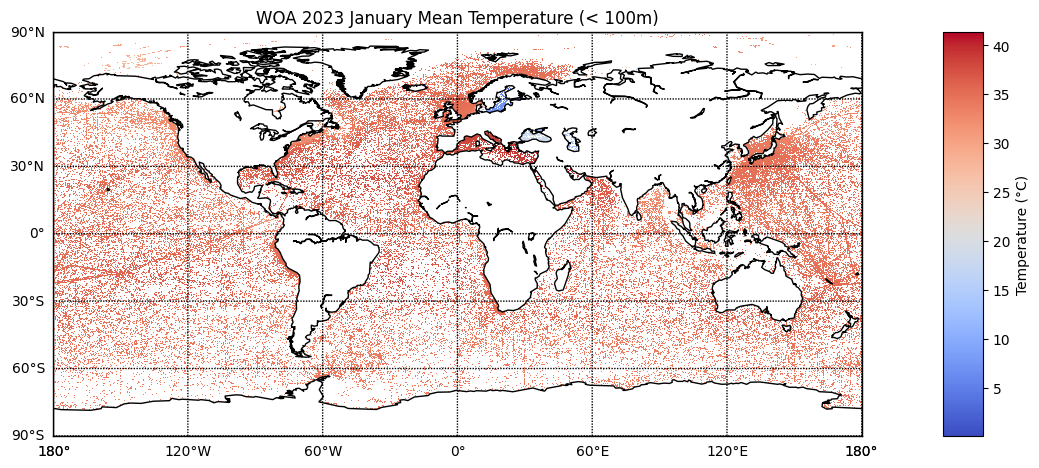

In [9]:
# Extract temperature mean (mn) and restrict to depth < 100m
depth_threshold = 100
t_mn = salinity_data['mn'].sel(depth=slice(0, depth_threshold)).mean(dim='depth')

# Check if the data is not empty
if np.any(np.isfinite(t_mn.values)):
    # Plotting the world ocean map with temperature distribution
    fig, ax = plt.subplots(figsize=(12, 8))
    m = Basemap(projection='cyl', lon_0=0, ax=ax)
    m.drawcoastlines()
    m.drawmapboundary()
    m.drawparallels(np.arange(-90., 91., 30.), labels=[1, 0, 0, 0])
    m.drawmeridians(np.arange(0., 360., 60.), labels=[0, 0, 0, 1])

    lon, lat = np.meshgrid(t_mn.lon, t_mn.lat)
    x, y = m(lon, lat)

    c_scheme = m.pcolormesh(x, y, t_mn, shading='auto', cmap='coolwarm')
    cbar = m.colorbar(c_scheme, location='right', pad="10%")
    cbar.set_label('Temperature (°C)')

    plt.title('WOA 2023 January Mean Temperature (< 100m)')
    plt.show()
else:
    print("No valid data to plot.")

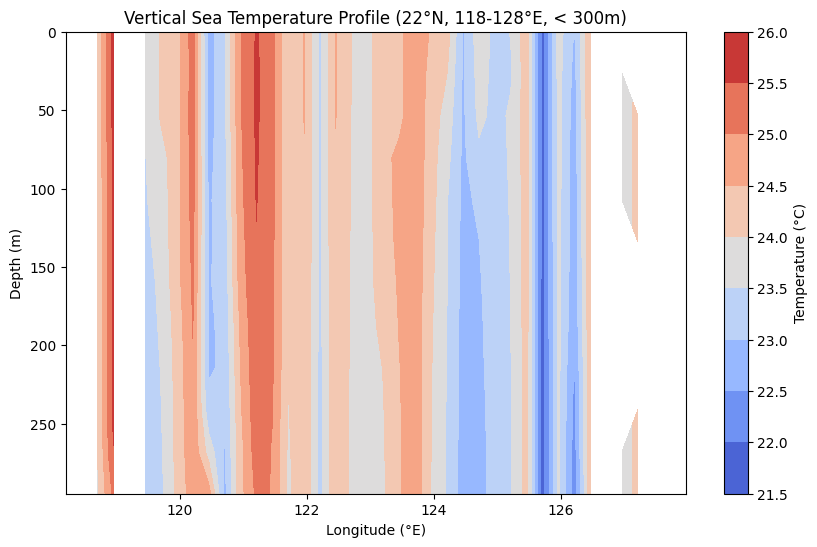

In [15]:
# Plotting the vertical sea temperature profile at latitude N 22 degree, longitude 118-128 degree, depth < 300m
depth_threshold = 300
lat_value = 22
lon_start = 118
lon_end = 128
lat_selected = temperature_data['mn'].sel(lat=lat_value, method='nearest').lat.item()

t_profile = temperature_data['mn'].sel(depth=slice(0, depth_threshold), lat=lat_selected, lon=slice(lon_start, lon_end))

# Plotting the vertical sea temperature profile
fig, ax = plt.subplots(figsize=(10, 6))
x, y = np.meshgrid(t_profile.lon, t_profile.depth)
contour = ax.contourf(x, y, t_profile[:, :], cmap='coolwarm')
cbar = plt.colorbar(contour)
cbar.set_label('Temperature (°C)')

ax.invert_yaxis()
ax.set_xlabel('Longitude (°E)')
ax.set_ylabel('Depth (m)')
plt.title(f'Vertical Sea Temperature Profile (22°N, 118-128°E, < 300m)')
plt.show()

In [114]:
# Load the Zarr dataset
data_dir = '../data'
grid_res = '04'  # Change this to '01' for 1-degree resolution, '04' for 0.25-degree
grid_dir = {'04': '025_degree', '01': '1_degree'}
param = 's'
time_period = '0'  # Use numeric key as a string
test_var = 'mn' # mean value

parameters = {
    't': 'temperature',
    's': 'salinity',
    'o': 'oxygen',
    'O': 'o2sat',
    'A': 'AOU',
    'i': 'silicate',
    'p': 'phosphate',
    'n': 'nitrate'
}

parameters_name = {
    't': 'temperature',
    's': 'salinity',
    'o': 'dissolved oxygen',
    'O': 'percent oxygen saturation',
    'A': 'apparent oxygen utilization',
    'i': 'silicate',
    'p': 'phosphate',
    'n': 'nitrate'
}

units = {
    't': '°C',
    's': '',
    'o': 'µmol/kg',
    'O': '%',
    'A': 'µmol/kg',
    'i': 'µmol/kg',
    'p': 'µmol/kg',
    'n': 'µmol/kg'
}

time_periods = {
    '0': 'annual',
    '1': 'january',
    '2': 'february',
    '3': 'march',
    '4': 'april',
    '5': 'may',
    '6': 'june',
    '7': 'july',
    '8': 'august',
    '9': 'september',
    '10': 'october',
    '11': 'november',
    '12': 'december',
    '13': 'winter',
    '14': 'spring',
    '15': 'summer',
    '16': 'autumn'
}

# Determine subgroup
def determine_subgroup(param, period):
    param_name = parameters[param]
    param_group = 'Nutrients'

    if param_name in ['temperature', 'salinity']:
        param_group = 'TS'
    elif param_name in ['oxygen', 'o2sat', 'AOU']:
        param_group = 'Oxy'
    
    if period == '0':
        subgroup = f'annual/{param_group}'
    elif period in ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']:
        subgroup = f'monthly/{param_group}'
    else:
        subgroup = f'seasonal/{param_group}'    

    return subgroup

subgroup = determine_subgroup(param[0], time_period)
datax = os.path.join(data_dir, grid_dir[grid_res], subgroup)
ds = xr.open_zarr(datax, consolidated=False)



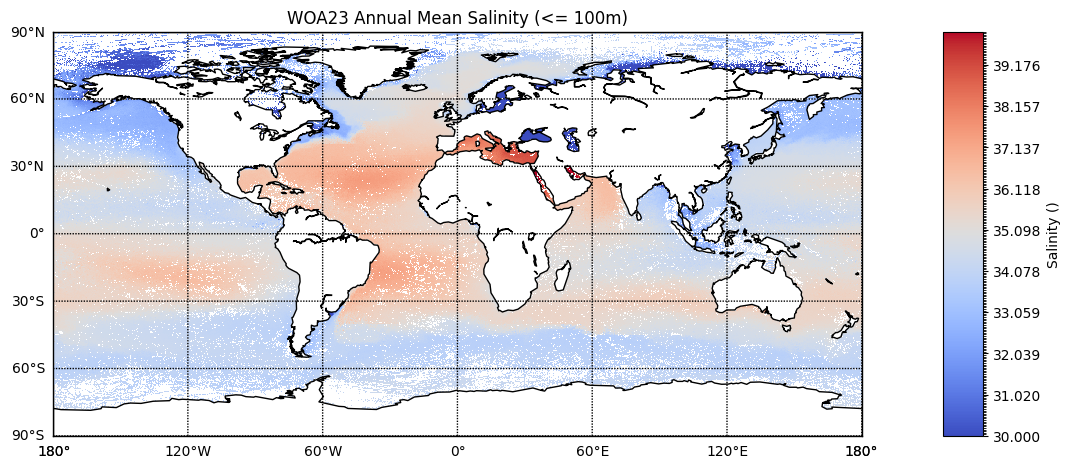

In [116]:
# Extract temperature mean (mn) and restrict to depth < 100m
depth_threshold = 100
if parameters[param] in ds.parameters.values and time_period in ds.time_periods.values:
    data = ds.sel(parameters=parameters[param], time_periods=time_period)
    data_mn = data[test_var].sel(depth=slice(0, depth_threshold + 1)).mean(dim='depth')

    # Check if the data is not empty
    if np.any(np.isfinite(data_mn.values)):
        # Plotting the world ocean map with data distribution
        fig, ax = plt.subplots(figsize=(12, 8))
        m = Basemap(projection='cyl', lon_0=0, ax=ax)
        m.drawcoastlines()
        m.drawmapboundary()
        m.drawparallels(np.arange(-90., 91., 30.), labels=[1, 0, 0, 0])
        m.drawmeridians(np.arange(0., 360., 60.), labels=[0, 0, 0, 1])

        lon, lat = np.meshgrid(data_mn.lon, data_mn.lat)
        x, y = m(lon, lat)

        if param == 's':
            # Custom color scale for salinity
            levels = np.linspace(30, 40, 256)
            cmap = plt.get_cmap('coolwarm')
            norm = mcolors.BoundaryNorm(levels, ncolors=cmap.N, clip=True)
            c_scheme = m.pcolormesh(x, y, data_mn, cmap=cmap, norm=norm)
        else:
            c_scheme = m.pcolormesh(x, y, data_mn, shading='auto', cmap='coolwarm')

        cbar = m.colorbar(c_scheme, location='right', pad="10%")
        cbar.set_label(f'{parameters_name[param].title()} ({units[param]})')

        plt.title(f'WOA23 {time_periods[time_period].title()} Mean {parameters_name[param].title()} (<= {depth_threshold}m)')
        plt.show()
    else:
        print("No valid data to plot.")
else:
    print("Parameter or time period not found in the Zarr dataset.")

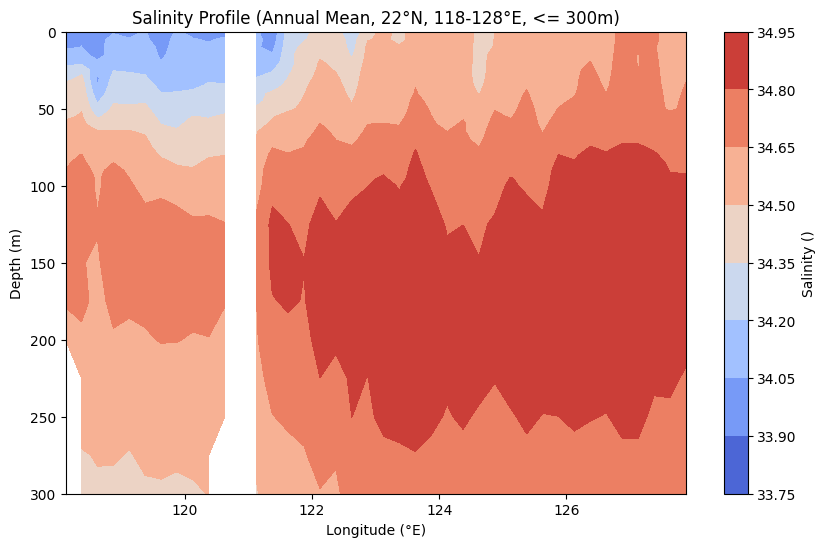

In [117]:
# Select temperature data
# param = 'temperature'
# time_period = '1'  # Use numeric key as a string
if parameters[param] in ds.parameters.values and time_period in ds.time_periods.values:
    data = ds.sel(parameters=parameters[param], time_periods=time_period)
    if np.any(np.isfinite(data[test_var].values)):
        depth_threshold = 300
        lat_value = 22
        lon_start = 118
        lon_end = 128
        lat_selected = data[test_var].sel(lat=lat_value, method='nearest').lat.item()

        profile = data[test_var].sel(depth=slice(0, depth_threshold+1), lat=lat_selected, lon=slice(lon_start, lon_end))

        # Plotting the vertical sea temperature profile
        fig, ax = plt.subplots(figsize=(10, 6))
        x, y = np.meshgrid(profile.lon, profile.depth)
        contour = ax.contourf(x, y, profile[:, :], cmap='coolwarm')
        cbar = plt.colorbar(contour)
        cbar.set_label(f'{parameters_name[param].title()} ({units[param]})')

        ax.invert_yaxis()
        ax.set_xlabel('Longitude (°E)')
        ax.set_ylabel('Depth (m)')
        plt.title(f'{parameters_name[param].title()} Profile ({time_periods[time_period].capitalize()} Mean, {lat_value}°N, {lon_start}-{lon_end}°E, <= {depth_threshold}m)')
        plt.show()
    else:
        print("No finite values found in the data.")
else:
    print("Parameter or time period not found in the Zarr dataset.")